In [2]:
##-------------------------------------------------------------------------------
## NUMERICAL PDE SOLUTION OF CONTINUITY EQUATION

## This code reproduces Section 3/Figure 4 of Millholland, MacLeod, Xiao (2025)

import pde
import numpy as np
%matplotlib inline
import matplotlib;
import matplotlib.pyplot as plt


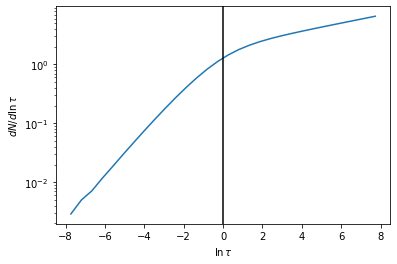

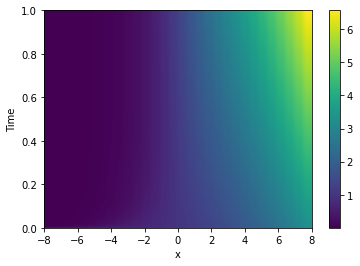

In [3]:
## Evolve the PDE solution

len_time = 1.0  
time_between_outputs = 0.005   
output_times = np.linspace(0, len_time, int(len_time/time_between_outputs) + 1, endpoint = True)

# initialize the equation and the space
# here the source distribution is ~exp(2/13 x)
eq = pde.PDE({"g": "exp(-x)*(d_dx(g) - g) + exp(2./13*x) "})
grid = pde.CartesianGrid([[-8,8]], [30], periodic=False)
state = pde.ScalarField.from_expression(grid, "exp(2./13*x)")

# solve the equation and store the trajectory
storage = pde.MemoryStorage()
result = eq.solve(state, t_range = len_time, adaptive = True,
  tracker = storage.tracker(time_between_outputs),dt = 1e-4)
plt.plot( result.grid.cell_coords, result.data)

plt.axvline(np.log(len_time), color = 'k')


plt.semilogy()
plt.xlabel(r'$\ln \tau$')
plt.ylabel(r'$dN/d\ln \tau$')
plt.show()

# plot the trajectory as a space-time plot
pde.plot_kymograph(storage)



/Users/Sarah1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


t = 0.0  slope =  0.15
t = 0.1  slope =  0.79
t = 0.2  slope =  0.82
t = 0.3  slope =  0.83
t = 0.4  slope =  0.83
t = 0.5  slope =  0.83
t = 0.6  slope =  0.83
t = 0.7  slope =  0.83
t = 0.8  slope =  0.83
t = 0.9  slope =  0.83
t = 1.0  slope =  0.83


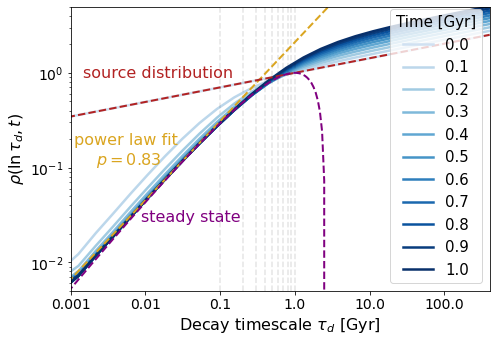

In [4]:
## Plot PDE solution over time

N_curves = 10
mult_factor = int(len_time/time_between_outputs/N_curves)

cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(i*(1/(N_curves+2)) + 0.2) for i in range(N_curves+1)]

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)

for i in range(N_curves+1):

    # Plot data
    x = (result.grid.cell_coords).flatten()
    y = np.log(storage.data[i*mult_factor])
    deriv = (y[1:]-y[:-1])/(x[1:]-x[:-1])
    plt.plot(x, np.exp(y), label = np.round(output_times[i*mult_factor], 1), color = colors[i], linewidth = 2.5)
    plt.axvline(np.log(output_times[i*mult_factor]), color = 'k', linestyle = '--', alpha = 0.1)

    # Power law fit
    indices = np.where((x > -5) & (x < -2.5) & ~np.isnan(y))[0]
    p_fit = np.polyfit(x[indices], y[indices], deg = 1)
    print ('t =', np.round(output_times[i*mult_factor], 2), ' slope = ', np.round(p_fit[0], 2))


x_fit = np.linspace(-7, 6, 200)
power_law_fit = np.exp(p_fit[0]*x_fit + p_fit[1])
source = np.exp(2./13*x_fit)
tau_decay_peak = 1.0
C1_over_A = (15./2)*tau_decay_peak**(2./13)
steady_state = C1_over_A*np.exp(x_fit) - 13./2*np.exp(15./13*x_fit)  


plt.plot(x_fit, power_law_fit, color = 'goldenrod', linestyle = '--', linewidth = 2)
plt.plot(x_fit, source, color = 'firebrick', linestyle = '--', linewidth = 2)
plt.plot(x_fit, steady_state, color = 'purple', linestyle = '--', linewidth = 2)

plt.xlim(-3, 6)
plt.ylim(0.005, 5) 
plt.yscale('log')

tau_ticks = np.array([0.001, 0.01, 0.1, 1, 10, 100])
ax.set_xticks(np.log(tau_ticks))
ax.set_xticklabels(tau_ticks)

plt.xlabel('Decay timescale ' + r'$\tau_d \ [\mathrm{Gyr}]$', fontsize = 16)
plt.ylabel(r'$\rho(\ln \tau_d, t)$', fontsize = 16)

plt.tick_params(axis = 'both', labelsize = 14)

plt.text(np.log(0.006), 0.15, 'power law fit \n' + r'$p = 0.83$', color = 'goldenrod', fontsize = 16, horizontalalignment = 'center', verticalalignment = 'center')
plt.text(np.log(0.04), 0.03, 'steady state', color = 'purple', fontsize = 16, horizontalalignment = 'center', verticalalignment = 'center')
plt.text(np.log(0.015), 1, 'source distribution', color = 'firebrick', fontsize = 16, horizontalalignment = 'center', verticalalignment = 'center')

plt.legend(fontsize = 15, ncol = 1, title = 'Time [Gyr]', title_fontsize = 15, loc = 'lower right')

plt.tight_layout()
